In [6]:
import numpy as np
import os
import pandas as pd
from pandas import ExcelWriter
import matplotlib.pyplot as plt
import openpyxl
import matplotlib as mpl
import scipy as sp
from scipy import stats
from scipy import signal
from scipy import fft
from scipy import io
from scipy import interpolate
from scipy import optimize
from scipy import linalg
from scipy import integrate
from scipy.fft import dct
from scipy import signal

mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [
    r'\usepackage{textcomp}',
    r'\usepackage{wasysym}']
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.size'] = 22
mpl.rcParams['font.family'] = 'STIXGeneral'
from BackDiffuse_LT import BackDiffuse


showFigs=True

In [9]:
import h5py
filename = '/home/thea/MesterTesen/CFM-thea/cfm_mytests/steady_state_test_results_temp/SiteA_test.hdf5' 

f = h5py.File(filename,'r')
for key in f.keys():
    print(key)
    
age = f['age'][()]
depth = f['depth'][()]
temperature = f['temperature'][()]
Modelclimate = f['Modelclimate'][()]
density = f['density'][()]
#isotopes= f['isotopes'][()]
iso_sigma18 = f['iso_sigma18'][()]
iso_dsigma2_dt_18 = f['iso_dsigma2_dt_18'][()]
drho_dt = f['drho_dt'][()]

Modelclimate
age
density
depth
drho_dt
iso_dsigma2_dt_17
iso_dsigma2_dt_18
iso_dsigma2_dt_D
iso_sigma17
iso_sigma18
iso_sigmaD
temperature


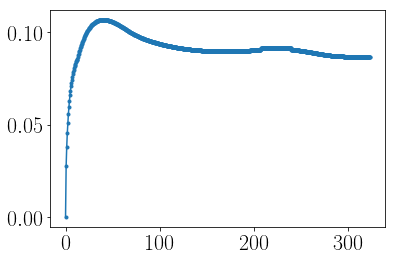

In [13]:
fig, ax = plt.subplots()
ax.plot(depth[-1][1:],iso_sigma18[-1][1:],'.-')
#ax.set(ylim=(243,244.5))

In [ ]:
ys_d18O_forcing_SiteA = np.hstack(np.array([np.arange(1891,1920),np.arange(1931,1960)]))-1985
d18O_forcing_SiteA = np.hstack(np.array([-34.02*np.ones(1920-1891),-32.86*np.ones(1960-1931)]))

d18O_forcing_SiteA_Full = np.asarray([ys_d18O_forcing_SiteA,d18O_forcing_SiteA])

In [ ]:


ys_accum_forcing_SiteA = np.arange(1943,1973) - 1985
accum_forcing_SiteA = 0.307 * np.ones(1973-1943)

accum_forcing_SiteA_Full = np.asarray([ys_accum_forcing_SiteA,accum_forcing_SiteA])

In [68]:
ys_temp_forcing_SiteA = np.arange(1948,1985)-1985
temp_forcing_SiteA = -29.41 * np.ones(1985-1948)+273.15

temp_forcing_SiteA_Full = np.asarray([ys_temp_forcing_SiteA,temp_forcing_SiteA])


In [ ]:
np.savetxt('/home/thea/MesterTesen/CFM-thea/cfm_mytests/cfm_my_forcings/temp_forcing_SiteA_TEST.csv',temp_forcing_SiteA_Full,delimiter=',')
np.savetxt('/home/thea/MesterTesen//CFM-thea/cfm_mytests/cfm_my_forcings/accum_forcing_SiteA_TEST.csv',accum_forcing_SiteA_Full,delimiter=',')
np.savetxt('/home/thea/MesterTesen/CFM-thea/cfm_mytests/cfm_my_forcings/d18O_forcing_SiteA_TEST.csv',d18O_forcing_SiteA_Full,delimiter=',')

In [ ]:
d18O_forcing_SiteA_Full

In [ ]:
test = pd.read_csv('/home/thea/MesterTesen/CFM-thea/cfm_mytests/cfm_my_forcings/accum_forcing_SiteA_TEST2.csv',',',header=None).transpose()

In [ ]:
np.loadtxt('/home/thea/MesterTesen/CFM-thea/cfm_mytests/cfm_my_forcings/temp_forcing_SiteA_TEST.csv',delimiter=',')

# Create .txt file of back diffused data

In [86]:
CoresSpecs = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Data/CoreSpecs.txt', ',')

coreNames = CoresSpecs['CoreName']


site = 'Crete'

core_idx = coreNames[CoresSpecs['CoreName'] == site].index[0]
CoreSpecs = CoresSpecs.iloc[core_idx]
dTamb = CoreSpecs['dTamb']
dLaki = CoreSpecs['dLaki']
Accum0 = CoreSpecs['Accum0']
T0 = CoreSpecs['T0']

DataAll = GetCoreData(site)

data_d18O = DataAll[0]; data_d18O_LT = DataAll[1]
data_ECM = DataAll[2]; data_ECM_LT = DataAll[3]
data_dens = DataAll[4]; data_dens_LT = DataAll[5]
data_diff = DataAll[6]; data_diff_LT = DataAll[7]


depth_LT = data_d18O_LT['depth']
d18O_LT = data_d18O_LT['d18O']


No ECM file found, setting empty df instead


In [87]:
inst = BackDiffuse(site, data_d18O_LT, CoresSpecs, dTamb, dLaki, 32, diffLenData=data_diff_LT[['Depth','sigma_o18']], densData=data_dens_LT)
diffLen = inst.spectralEstimate()
difflenEstHL = inst.diffLenEstimateHL()
print(f'Accum0 = {Accum0:.3f}')
print(f'Temp0 = {T0+273.15:.3f}')
depthOG, dataOG, diffLenOG, peaksOG, arr_DiffLens, arr_Npeaks, arr_depth, arr_data = inst.backDiffused(theoDiffLen=True,print_Npeaks=False, diffLenStart_In=0.005, diffLenEnd_In=0.15, interpAfterDecon=True)


Accum0 = 0.280
Temp0 = 242.750
Starting sigma: 6.28 [cm]
Final sigma: 6.02 [cm]
Final # of peaks: 32
Delta: 0.026
Delta new: 0.013


In [89]:
d = dict(depth = np.asarray(depth_LT), d18O = np.asarray(d18O_LT), depth_BD = depthOG, d18O_BD = dataOG+np.mean(d18O_LT))
df = pd.DataFrame.from_dict(d, orient = 'index').transpose()
df.to_csv('/home/thea/Documents/KUFysik/MesterTesen/Analysis/BackDiffusedSeries/'+site+'_BackDiffused', header=True,index=False, sep='\t')

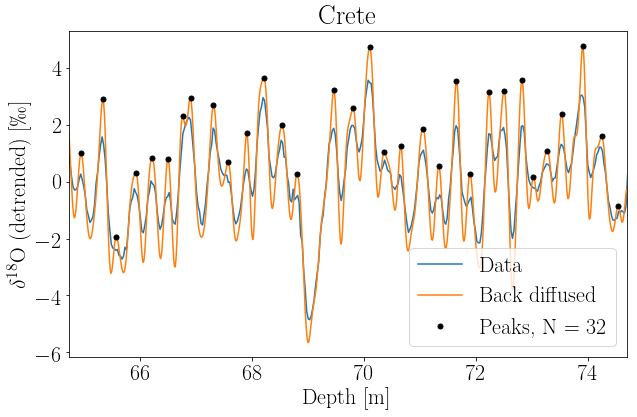

In [88]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(depth_LT,d18O_LT-np.mean(d18O_LT), label='Data')
ax.plot(depthOG,dataOG, label='Back diffused')
ax.plot(depthOG[peaksOG],dataOG[peaksOG],'.', ms=10,color='k',label=f'Peaks, N = {len(peaksOG)}')
ax.set(xlim=(min(depthOG),max(depthOG)), xlabel='Depth [m]', ylabel='$\delta^{18}$O (detrended) [\permil]', title=site);
ax.legend();

# Analytic diffusion length profile estimate

In [2]:
import sys 
import os
sys.path.append('../')

from BackDiffuse_LT import BackDiffuse
from GetCoreData_fct import GetCoreData



from Interpolation_Class import Interpolation

In [3]:
CoresSpecs = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Data/CoreSpecs.txt', ',')
coreNames = CoresSpecs['CoreName']
site = 'SiteA'

core_idx = coreNames[CoresSpecs['CoreName'] == site].index[0]
CoreSpecs = CoresSpecs.iloc[core_idx]

dTamb = CoreSpecs['dTamb']
dLaki = CoreSpecs['dLaki']
bdot0 = CoreSpecs['Accum0']
Temp0 = CoreSpecs['T0']+273.15
dens0 = CoreSpecs['dens0']
z0 = CoreSpecs['z0']


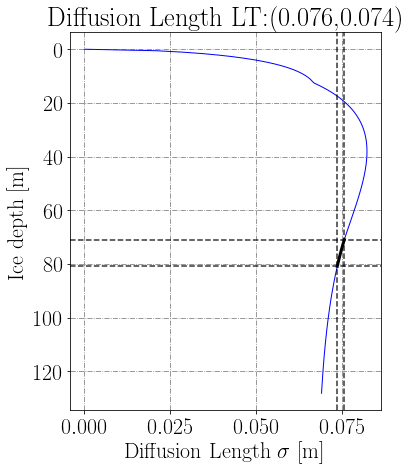

In [8]:
figDiff, axDiff= plt.subplots(figsize=(6,7))

sigmas = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Data/datasets/Alphabet_cores/AlphabetDiff/' + site + '_DepthDiffThea.txt','\t')
sigma_arr = sigmas['sigma_o18']
z_vec = sigmas['Depth']

TambDepth = dTamb
LakiDepth = dLaki
z_LT = z_vec[(z_vec >= TambDepth) & (z_vec <= LakiDepth)]
sigma_LT = np.asarray(sigma_arr[(z_vec >= TambDepth) & (z_vec <= LakiDepth)])

axDiff.invert_yaxis()
axDiff.plot(sigma_arr,z_vec, 'b', lw=1)
axDiff.plot(sigma_LT,z_LT, 'k', lw=3)
axDiff.axhline(y = TambDepth, alpha=0.8, color='k', ls='--', lw=1.5)
axDiff.axhline(y = LakiDepth, alpha=0.8, color='k', ls='--', lw=1.5)
axDiff.axvline(x = sigma_LT[0], alpha=0.8, color='k', ls='--', lw=1.5)
axDiff.axvline(x = sigma_LT[-1], alpha=0.8, color='k', ls='--', lw=1.5)
axDiff.set(xlabel='Diffusion Length $\sigma$ [m]', ylabel='Ice depth [m]',title=f'Diffusion Length LT:({sigma_LT[0]:.3f},{sigma_LT[-1]:.3f})')
axDiff.grid(True, color='grey',ls='-.')
figDiff.tight_layout()
